In [ ]:
import pandas as pd
import tensorflow
from tensorflow.keras.models import Sequential
from  tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [ ]:
from google.colab import auth
import gspread
from google.auth import default
import pandas as pd


auth.authenticate_user()
creds, _ = default()
gc = gspread.authorize(creds)


worksheet = gc.open('mymldata').sheet1


rows = worksheet.get_all_values()

In [ ]:
df = pd.DataFrame(rows[1:], columns=rows[0])

df.head()

,input,output
0,1,6
1,3,16
2,5,26
3,7,36
4,9,46


In [ ]:
dataset1=pd.DataFrame(rows[1:],columns=rows[0])
dataset1=dataset1.astype({"input":"float"})
dataset1=dataset1.astype({"output":"float"})

In [ ]:
dataset1.head()

,input,output
0,1.0,6.0
1,3.0,16.0
2,5.0,26.0
3,7.0,36.0
4,9.0,46.0


In [ ]:
X=dataset1[['input']].values
y=dataset1[['output']].values

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size =0.33,random_state=42)

In [ ]:
Scaler=MinMaxScaler()
Scaler.fit(X_train)
X_train1=Scaler.transform(X_train)
X_test1=Scaler.transform(X_test)

In [ ]:
Network=Sequential([
    Dense(units=8,activation='relu',),
    Dense(units=10,activation='relu'),

    Dense(units=1)

    ])

In [ ]:
Network.compile(optimizer='rmsprop',loss='mse')



In [ ]:
Network.fit(X_train1,y_train,epochs=1000)

Epoch 1/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 100.5774
Epoch 2/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 100.0578
Epoch 3/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 99.5395
Epoch 4/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 99.0223
Epoch 5/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 98.5063
Epoch 6/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 97.9914
Epoch 7/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 97.4779
Epoch 8/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 96.9654
Epoch 9/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 96.4541
Epoch 10/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 95.9440
Epoch 11/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 95.4352
Epoch 12/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 94.9275
Epoch 13/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 94.4210
Epoch 14/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 93.9158
Epoch 15/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - l

In [ ]:
loss_df=pd.DataFrame(Network.history.history)


<Axes: >

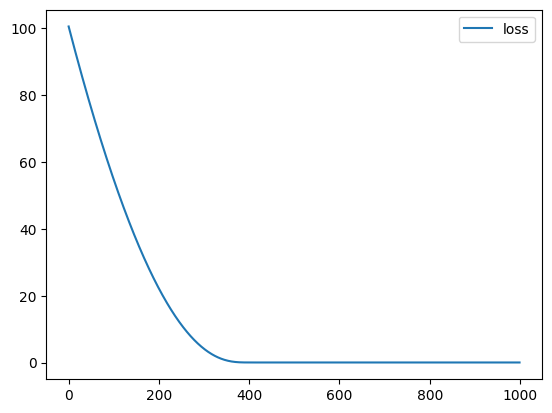

In [ ]:
loss_df.plot()

In [ ]:
X_test1=Scaler.transform(X_test)

In [ ]:
Network.evaluate(X_test1,y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.1533


0.15325523912906647

In [ ]:
X_n1=[[5]]

In [ ]:
X_n1_1=Scaler.transform(X_n1)


In [ ]:
Network.predict(X_n1_1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


array([[25.958946]], dtype=float32)

In [ ]:
Network=Sequential([
    Dense(units=9,activation='relu',input_shape=[8]),
    Dense(units=9,activation='relu'),
    Dense(units=9,activation='relu'),
    Dense(units=4)

    ])